## Sampling of Sinusoid

* continuos sinusoid $x(t)$를 
* $T_s$로 sampling 할 경우
* **discrete sinusoid** $x[n]$을 얻음.

$$
\begin{align}
x[n] &= x(nT_s)\\
&= A \cos{(\omega n T_s)} \\
&= A \cos{(\omega T_s n )} \\
&= A \cos{ \Omega_0 n } \\
\end{align}
$$

where,
* $\Omega_0$ : 단위는 rad이며, 해당 discrete sinusoid $x[n]$의 angular freq.
* $A$ : Amplitude

Note that 
* units of $\Omega_0$ is just **rad**, whereas units of $\omega_0$ is **rad/sec**.
* $\Omega_0$ don't have any temporal information,(units: **rad**). 
* So, $x[n]$ is just a series(or list) of numbers.

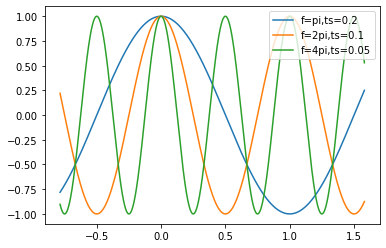

However, all discrete sinosoids are the same.

Becuase $\Omega_0$s are all the same!

In [78]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
from IPython.display import display, Markdown

t = np.arange(-1.*math.pi/4.,math.pi/2+0.01,0.001)
n = np.arange(-5,11)
A = 1

epsilon = sys.float_info.epsilon
def sinu(A,freq,n,Ts=None):
    if Ts is None:
        return A*np.cos(freq*t)
    return A*np.cos(Ts*freq*n)



freq = np.pi
Ts = 0.2
dsinu00 = sinu(A,freq,n,Ts)
sinu00 =  sinu(A,freq,t)

freq = 2.*np.pi
Ts = 0.1
dsinu01 = sinu(A,freq,n,Ts)
sinu01 =  sinu(A,freq,t)

freq = 4.*np.pi
Ts = 0.05
dsinu02 = sinu(A,freq,n,Ts)
sinu02 =  sinu(A,freq,t)

#plfigure()
plt.plot(t,sinu00,t,sinu01,t,sinu02)
plt.title='continuous'
plt.legend(('f=pi,ts=0.2','f=2pi,ts=0.1','f=4pi,ts=0.05'),loc='upper right')
plt.show()

#if np.all(dsinu00 == dsinu01) and np.all(dsinu01 == dsinu02) :
if np.all(np.isclose(dsinu00,dsinu01)) and np.all(np.isclose(dsinu00,dsinu02)) :
    display(Markdown('However, all discrete sinosoids are the same.'))
    display(Markdown('Becuase $\Omega_0$s are all the same!'))

* 즉, sampling에 의해 $\Omega_0$의 discrete sinusoid를 만들 수 있는 continuous sinusoid는 무수히 많음. ($\Omega_0 = T_s\omega_0$이기 때문.)
* 이는 discrete sinusoid에서 sampling 전의 continuous sinusoid를 복원할 때 문제가 됨.

### Even if the sampling interval, $T_s$ is known, **alias** problem remains.

In [79]:
Ts = 0.8

freq = np.pi
dsinu00 = sinu(A,freq,n,Ts)

freq = 1.5*np.pi
dsinu01 = sinu(A,freq,n,Ts)

freq = 6.*np.pi
dsinu02 = sinu(A,freq,n,Ts)

#if np.all(abs(dsinu00-dsinu01) < 1e-10 ) and np.all(abs(dsinu00-dsinu02) < 1e-10):
if np.all(np.isclose(dsinu00,dsinu01)) and np.all(np.isclose(dsinu00,dsinu02)) :
    display(Markdown('Even if $T_s$ is known, $\Omega_0$ can be the same!'))

Even if $T_s$ is known, $\Omega_0$ can be the same!

When you use a sampling freq. $f_s$, following two sinusoids become the same discrete sinusoid!

* $\cos{(2\pi f_0)}$
* $\cos{(2\pi f_0 +k f_s)}$ where $k$ is any integer.

**Proof.**
$$
\begin{align}
\cos{(2\pi (f_0+k f_s) n T_s)} &= \cos{(2\pi f_0 n T_s + 2\pi k f_s n T_s)} \\
&= \cos{(2\pi f_0 n T_s + 2\pi kn f_s T_s)} \\
&= \cos{(2\pi f_0 n T_s + 2\pi kn )} \\
&= \cos{(2\pi f_0 n T_s + 2\pi)} \\
&= \cos{(2\pi f_0 n T_s)} \\
\end{align}
$$
 where,
 * All Sinusoids are $2\pi$ periodic. ($\cos{(\theta)} = \cos{(\theta +2\pi k)}$
 * $f_s = \frac{1}{T_s}$

### Freq. $f_0+k f_s$ is the **alias** of freq. $f_0$ with the sampling freq. $f_s$.


---

## The Properties of Discrete Sinusoid.

* When discrete sinusoid is periodic, the freq. $f_0$ or $\frac{\Omega_0}{2\pi}$ should be **rational number (유리수)**! 
   * Discrete sinusoid is not always periodic!
   * $\frac{\Omega_0}{2\pi} = f_0 = \frac{k}{N}$ where $k$ and $n$ are integers.
* All (periodic)discrete sinusoid are $2\pi$ periodic
   * $e^{j2\pi k} = 1$
   * $e^{j (\Omega_0 +2\pi k) n} = e^{j\Omega_0n}e^{j2\pi kn} = e^{j\Omega_0n}$
   > 즉, $2\pi$ 정수배 떨어진 freq.를 갖는 discrete sinusoid는 구분할 수 없음.